# Test tensorflow gpu #

In [1]:
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
  except RuntimeError as e:
    print(e)

C:\Users\lukas\anaconda3\envs\ML\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\lukas\anaconda3\envs\ML\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
C:\Users\lukas\anaconda3\envs\ML\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


# Dataset #

In [2]:
import os
import codecs

data = {}
classes_file = './TextData/classes.txt'
with codecs.open(classes_file, 'r', encoding='utf-8') as cF:
    data = cF.read().split('\r\n')
len(data)

94

In [3]:
import os
from PIL import Image, ImageDraw, ImageFont

text_source = './TextData/text_full.txt'
fonts_path = './TextData/Fonts'
fonts = [f'{fonts_path}/{f}' for f in os.listdir(fonts_path)]
fonts

['./TextData/Fonts/arial.ttf',
 './TextData/Fonts/arialbd.ttf',
 './TextData/Fonts/arialbi.ttf',
 './TextData/Fonts/ariali.ttf',
 './TextData/Fonts/calibri.ttf',
 './TextData/Fonts/calibrib.ttf',
 './TextData/Fonts/calibrii.ttf',
 './TextData/Fonts/calibriz.ttf',
 './TextData/Fonts/cambria.ttc',
 './TextData/Fonts/cambriab.ttf',
 './TextData/Fonts/cambriai.ttf',
 './TextData/Fonts/cambriaz.ttf',
 './TextData/Fonts/consola.ttf',
 './TextData/Fonts/consolab.ttf',
 './TextData/Fonts/consolai.ttf',
 './TextData/Fonts/consolaz.ttf',
 './TextData/Fonts/constan.ttf',
 './TextData/Fonts/constanb.ttf',
 './TextData/Fonts/constani.ttf',
 './TextData/Fonts/constanz.ttf',
 './TextData/Fonts/corbel.ttf',
 './TextData/Fonts/cour.ttf',
 './TextData/Fonts/courbd.ttf',
 './TextData/Fonts/courbi.ttf',
 './TextData/Fonts/couri.ttf',
 './TextData/Fonts/impact.ttf',
 './TextData/Fonts/Roboto-Black.ttf',
 './TextData/Fonts/Roboto-BlackItalic.ttf',
 './TextData/Fonts/Roboto-Bold.ttf',
 './TextData/Fonts/Robo

In [4]:
dataset = []
sequence_len = 20

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import random
import cv2

def draw_img(img):
    plt.imshow(np.asarray(img), cmap='gray', vmin=0, vmax=255)
    plt.show()

def load_img(img):
    return cv2.imread(img, cv2.IMREAD_GRAYSCALE)

def dilate_img(img):
    return cv2.dilate(img, np.ones((2,2), np.uint8))

def otsu_thresholding(img):
    norm_img = np.zeros(img.shape)
    img = cv2.normalize(img, norm_img, 0, 255, cv2.NORM_MINMAX)
    blur = cv2.GaussianBlur(img, (3,3), 0)
    _, img = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    img = dilate_img(img)
    return img

## Load dataset ##

In [6]:
with open(text_source) as txt:
    word_count = 0
    sequence = ''
    dataset = []
    for i, line in enumerate(txt):
        words = line.split(' ')
        for single_word in words:
            word = ''.join([c for c in single_word if c in data])
            
#             if word[-1:] == '\n':
#                 word = word[:-1]
            
            if len(word) < 1:
                continue
            
            if len(word) > 30:
                split_count = len(word) // 30 + 1
                for i in range(split_count):
                    start = i * split_count
                    end = start + len(word) // split_count
                    dataset.append(word[start:end])          
                continue
                
            sequence = sequence + word + ' ' 
            word_count = (word_count + 1) % sequence_len
            if word_count == 0 or len(sequence) > 85:
                dataset.append(sequence[:-1])
                sequence = ''
                
dataset = list(set(dataset))
len(dataset)

34354

## Shuffle dataset ##

In [7]:
sorted_data = sorted(dataset, key=len)
longest_label = len(sorted_data[-1])
longest_label

109

In [8]:
import random

random.seed = 123456

random.shuffle(dataset)
# dataset = dataset[:20000]
dataset

['or Lorch. In the district of Gppingen, the VVS tariff has been applied since 2014 for',
 'Nancy Reinhold and Kim Segal. The band chose the name "the Wyrd Sisters" to represent',
 'to run. At the',
 'compared to buying them',
 'Dilate is her highest-selling and most critically acclaimed record, with US sales of over',
 'the females lay 50-80 eggs one at a time in the pulp of the fruit. After 612 days the',
 'Military DivisionRoyal NavyCommodore Donald Wyndham Beadle. Commodore Alan John Leahy,',
 'by Graham Nash) was about the 1968 Democratic convention. In their live album Four Way',
 'the finds, including',
 'and charm Roseneath is considered',
 'of Historic Places in',
 'claimed that they killed two',
 'Multibus and ECAD. ECAD (Electronic Computer Assisted Design, now known',
 'as the coach of the basketball team and',
 'Citharichthys spilopterus Gnther, 1862 (bay whiff) Citharichthys stampflii',
 'in St. Kitts-Nevis-Anguilla. Teresa Olga Hunt, Archivist,',
 'Lanham, MD: Lexington 

# Split data #

In [9]:
train_split = int(0.9 * len(dataset))
val_split = int(train_split + 0.09 * len(dataset))
# test_split = int(train_split + 0.1 * len(dataset))

train_labels = dataset[:train_split]
val_labels = dataset[train_split:val_split]
test_labels = dataset[val_split:]

# val_labels = dataset[train_split:val_split]
# test_labels = dataset[val_split:]

print('Len train: ' + str(len(train_labels)))
print('Len val: ' + str(len(val_labels)))
print('Len test: ' + str(len(test_labels)))

Len train: 30918
Len val: 3091
Len test: 345


# Model #

In [10]:
timesteps = 256

width = 4096
height = 64

max_label_len = longest_label + 2
max_label_len

111

In [11]:
from tensorflow.keras import applications, backend as K
from tensorflow.keras import models, losses, optimizers, Model, utils
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, MaxPooling2D, Dropout
from tensorflow.keras.layers import Flatten, Dense, Lambda, Reshape, Bidirectional, LSTM, GRU
from tensorflow.keras.layers import Activation, add, Concatenate, Attention, Embedding

def ctc_lambda_func(args):
    y_pred, labels, input_length, label_length = args
    return K.ctc_batch_cost(labels, y_pred, input_length, label_length)

def build_model(num_classes=94, timesteps=256, max_label_len=51, input_shape=(4096, 64, 1), training=False):
    inputs = Input(name='the_inputs', shape=input_shape, dtype='float32')
    
    # Convolution layer (VGG)
    inner = Conv2D(32, (3, 3), padding='same', name='conv1-1', kernel_initializer='he_normal')(inputs)
    inner = BatchNormalization()(inner)
    inner = Activation('relu')(inner)
    inner = Conv2D(32, (3, 3), padding='same', name='conv1-2', kernel_initializer='he_normal')(inputs)
    inner = BatchNormalization()(inner)
    inner = Activation('relu')(inner)
    inner = MaxPooling2D(pool_size=(2, 2), name='max1')(inner)

    inner = Conv2D(64, (3, 3), padding='same', name='conv2-1', kernel_initializer='he_normal')(inner)
    inner = BatchNormalization()(inner)
    inner = Activation('relu')(inner)
    inner = Conv2D(64, (3, 3), padding='same', name='conv2-2', kernel_initializer='he_normal')(inner)
    inner = BatchNormalization()(inner)
    inner = Activation('relu')(inner)
    inner = MaxPooling2D(pool_size=(2, 2), name='max2')(inner)

    inner = Conv2D(128, (3, 3), padding='same', name='conv3-1', kernel_initializer='he_normal')(inner)
    inner = BatchNormalization()(inner)
    inner = Activation('relu')(inner)
    inner = Conv2D(128, (3, 3), padding='same', name='conv3-2', kernel_initializer='he_normal')(inner)
    inner = BatchNormalization()(inner)
    inner = Activation('relu')(inner)
    inner = MaxPooling2D(pool_size=(4, 2), name='max3')(inner)

    inner = Conv2D(256, (3, 3), padding='same', name='conv4-1', kernel_initializer='he_normal')(inner)
    inner = BatchNormalization()(inner)
    inner = Activation('relu')(inner)
    inner = Conv2D(256, (3, 3), padding='same', name='conv4-2')(inner)
    inner = BatchNormalization()(inner)
    inner = Activation('relu')(inner)
    inner = MaxPooling2D(pool_size=(1, 2), name='max4')(inner)

    inner = Conv2D(512, (2, 2), padding='same', kernel_initializer='he_normal', name='con5-1')(inner)
    inner = BatchNormalization()(inner)
    inner = Activation('relu')(inner)
    inner = Conv2D(512, (2, 2), padding='same', kernel_initializer='he_normal', name='con5-2')(inner)
    inner = BatchNormalization()(inner)
    inner = Activation('relu')(inner)

    # CNN to RNN
    inner = Reshape(target_shape=((timesteps, 2048)), name='reshape')(inner)
    inner = Dense(128, activation='relu', kernel_initializer='he_normal', name='dense1')(inner)

    # RNN
    # encoder
    encoder = Bidirectional(LSTM(256, return_sequences=True, return_state=True))
    encoder_outputs, forward_h, forward_c, backward_h, backward_c = encoder(inner)
    state_h = Concatenate()([forward_h, backward_h])
    state_c = Concatenate()([forward_c, backward_c])
    encoder_states = [state_h, state_c]

    # decoder
    decoder_lstm = LSTM(512, return_sequences=True, return_state=True)
    decoder_outputs, _, _ = decoder_lstm(inner, initial_state=encoder_states)
    
    attention = Attention()([encoder_outputs, decoder_outputs])

    # RNN output -> character activations:
    outer = Dense(num_classes + 1, kernel_initializer='he_normal', name='dense2')(attention)
    y_pred = Activation('softmax', name='softmax')(outer)

    labels = Input(name='the_labels', shape=[max_label_len], dtype='float32')
    input_length = Input(name='input_length', shape=[1], dtype='int64')
    label_length = Input(name='label_length', shape=[1], dtype='int64')

    # Keras doesn't currently support loss funcs with extra parameters
    # so CTC loss is implemented in a lambda layer
    loss_out = Lambda(ctc_lambda_func, output_shape=(1,), name='ctc')([y_pred, labels, input_length, label_length]) #(None, 1)
    
    y_func = K.function([inputs], [y_pred])
    if training:
        return Model(inputs=[inputs, labels, input_length, label_length], outputs=loss_out), y_func
    else:
        return Model(inputs=[inputs], outputs=y_pred)

In [12]:
model, y_func = build_model(timesteps=timesteps, max_label_len=max_label_len, training=True)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
the_inputs (InputLayer)         [(None, 4096, 64, 1) 0                                            
__________________________________________________________________________________________________
conv1-2 (Conv2D)                (None, 4096, 64, 32) 320         the_inputs[0][0]                 
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 4096, 64, 32) 128         conv1-2[0][0]                    
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 4096, 64, 32) 0           batch_normalization_1[0][0]      
____________________________________________________________________________________________

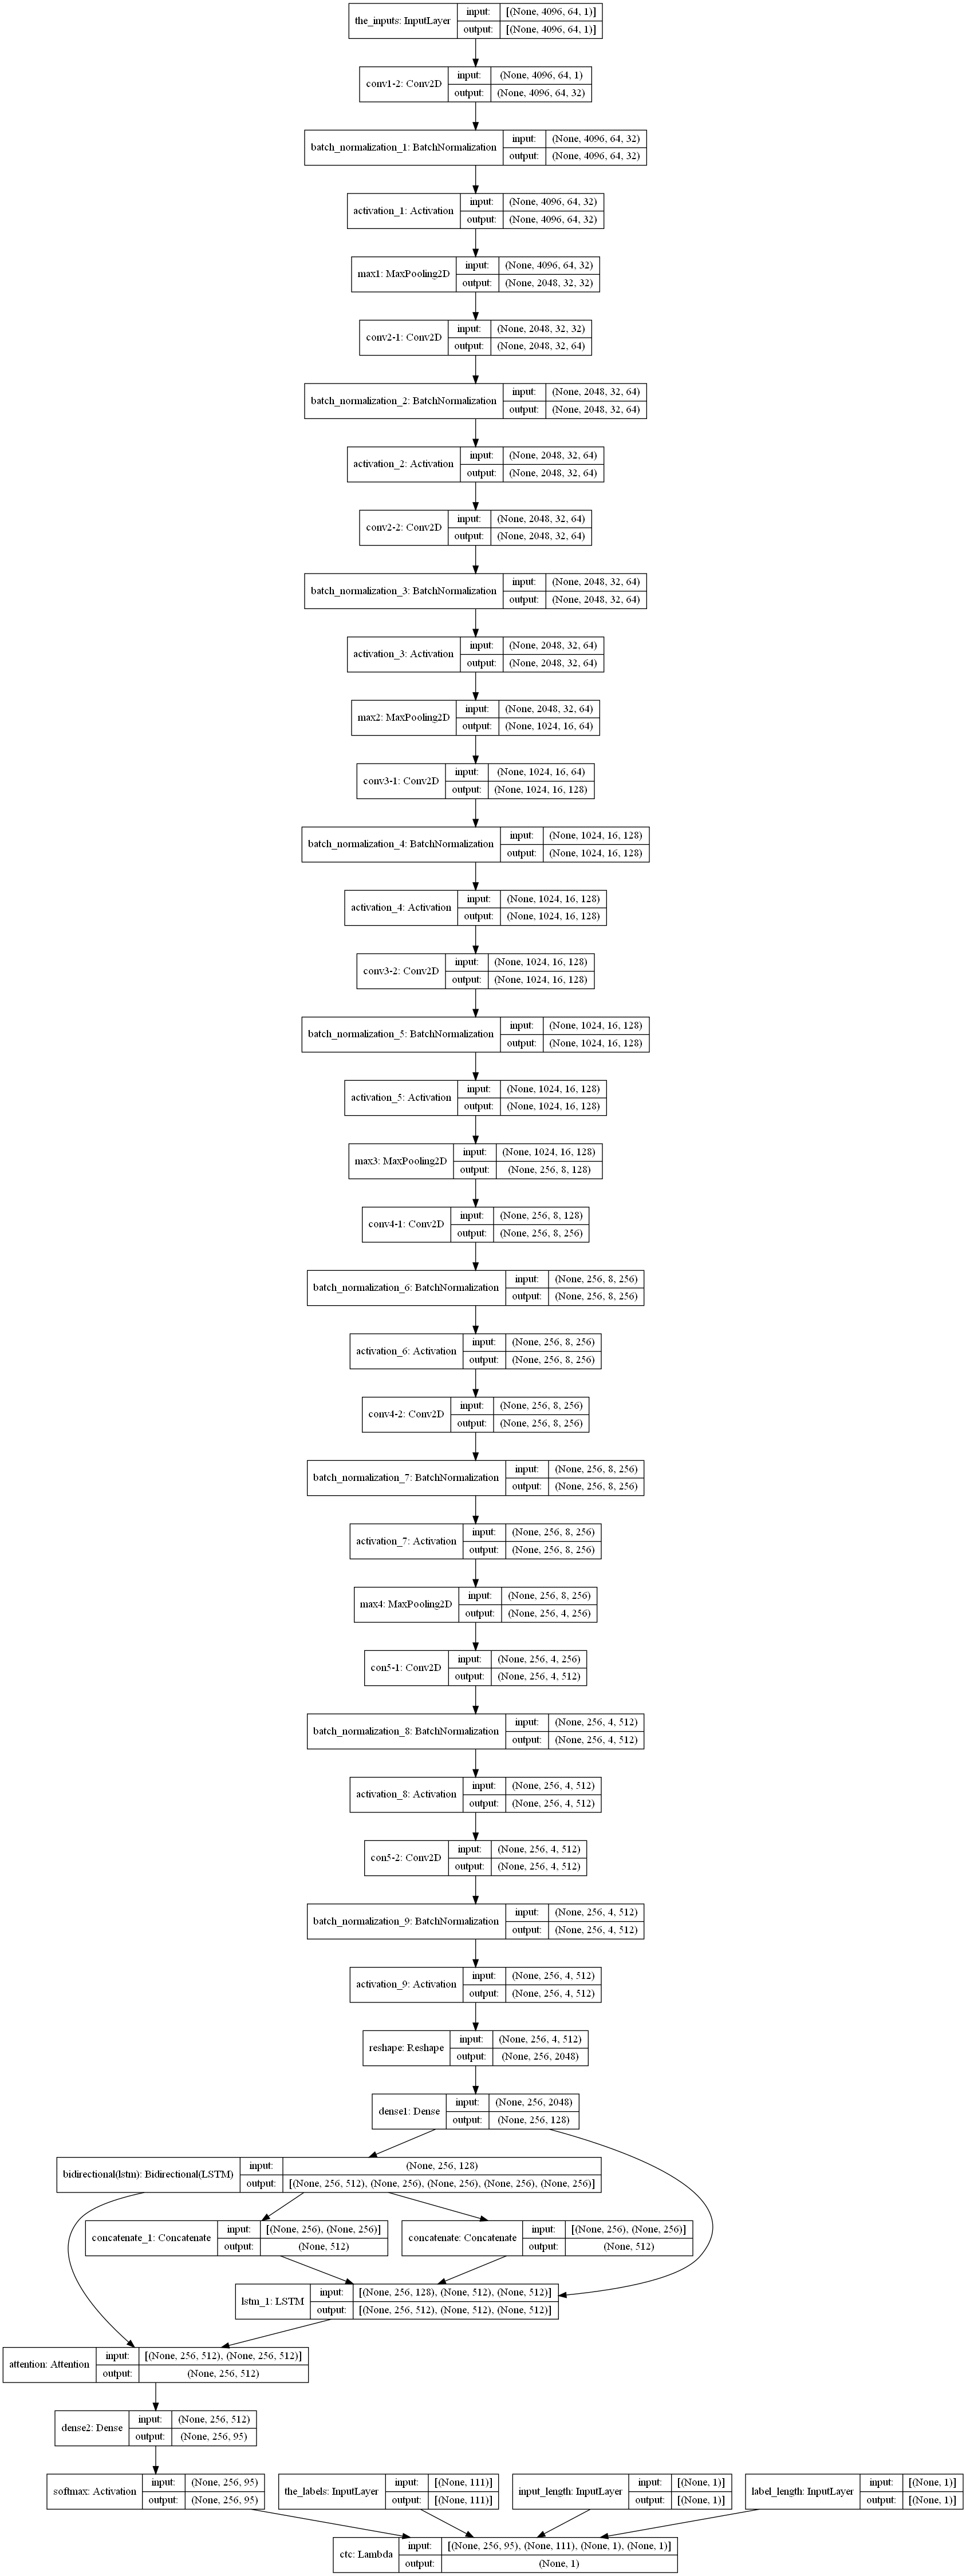

In [13]:
from tensorflow.keras.utils import plot_model
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

plot_model(model=model, show_shapes=True)

# Data generator #

In [14]:
import itertools

def return_classes(string):
    text = [' '] + list(string) + [' ']
    classes = [data.index(x) if x in data else 1 for x in text]
    return np.asarray(classes)

def return_text(classes):
    text = ''
    for c in classes:
        if 0 <= c < len(data) and c != 1:
            text += data[c]
    return text

def decode_batch(out, callback=False):
    ret = []
    for i in range(out.shape[0]):
        out_best = list(np.argmax(out[i, 2:], 1))
        out_best2 = [k for k, g in itertools.groupby(out_best)]
        outstr = return_text(out_best2)
        if callback:
            print(f'{out_best} -> {outstr}')
        ret.append(outstr)
    return ret

def gen_text_image(text, padding=16):
    font = random.choice(fonts)
    fnt = ImageFont.truetype(font, 60)
    width, _ = fnt.getsize(text)
    img = Image.new('L', (width + (padding + 1) * 2, 64), color=255)
    d = ImageDraw.Draw(img)

    # correct the text position for different fonts
    if 'calibri' in font:
        d.text((padding + 2,2), text, font=fnt, fill=0)
    elif 'verdana' in font:
        d.text((padding + 2,-8), text, font=fnt, fill=0)
    elif 'constan' in font:
        d.text((padding + 2,0), text, font=fnt, fill=0)
    elif 'corbel' in font:
        d.text((padding + 2,2), text, font=fnt, fill=0)
    elif 'consola' in font:
        d.text((padding + 2,2), text, font=fnt, fill=0)
    elif 'cour' in font:
        d.text((padding + 2,-4), text, font=fnt, fill=0)
    elif 'tahoma' in font:
        d.text((padding + 2,-8), text, font=fnt, fill=0)
    else:
        d.text((padding + 2,-6), text, font=fnt, fill=0)
        
    image = np.array(img)
    image = add_salt_and_pepper(image, 0.25)
    image = otsu_thresholding(image)
    image = inverse(image)
    image = (image / 255.) * 2. - 1.
    return image

def inverse(image):
    return cv2.bitwise_not(image)

# add noise to the image
def add_salt_and_pepper(image, amount):
    output = np.copy(np.array(image))
    # add salt
    nb_salt = np.ceil(amount * output.size * 0.5)
    coords = [np.random.randint(0, i - 1, int(nb_salt)) for i in output.shape]
    output[coords] = random.randint(50,200)

    # add pepper
    nb_pepper = np.ceil(amount * output.size * 0.5)
    coords = [np.random.randint(0, i - 1, int(nb_pepper)) for i in output.shape]
    output[coords] = random.randint(0,100)
    return np.asarray(Image.fromarray(output))

In [15]:
class TextImageGenerator:
    def __init__(self, labels, img_w=4096, img_h=64,
                 batch_size=64, timesteps=500, training=True, max_text_len=max_label_len):
        self.dim = (img_w, img_h, 1)
        self.batch_size = batch_size
        self.max_text_len = max_text_len
        self.labels = labels
        self.n = len(self.labels)
        self.indexes = list(range(self.n))
        self.training = training
        self.cur_index = 0
        
    def next_sample(self):
        self.cur_index += 1
        if self.cur_index >= self.n:
            self.cur_index = 0
            random.shuffle(self.indexes)
        return self.labels[self.indexes[self.cur_index]]
            
    
    def next_batch(self):
        while True:
            X = np.zeros((self.batch_size, *self.dim))
            y = np.zeros((self.batch_size, self.max_text_len), dtype=int)
            input_length = np.full((self.batch_size, 1), timesteps, dtype=np.float32)
            label_length = np.zeros((self.batch_size, 1), dtype=np.float32)
            
            for i in range(self.batch_size):
                label = self.next_sample()
                # Store sample
                image = np.swapaxes(gen_text_image(label), 0, 1)
                image = np.expand_dims(image, -1)
                X[i, 0:image.shape[0], :] = image

                # Store class
                label_classes = return_classes(label)
                y[i, :len(label_classes)] = label_classes
                label_length[i] = len(label_classes)

            inputs = {
                'the_inputs': X,  # (bs, 4096, 64, 1)
                'the_labels': y,  # (bs, 51)
                'input_length': input_length,  # (bs, 1)
                'label_length': label_length  # (bs, 1)
            }
            outputs = {'ctc': np.zeros([self.batch_size])}   # (bs, 1)
            yield (inputs, outputs)

# Callbacks #

In [16]:
import editdistance
from datetime import datetime
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler, ModelCheckpoint
from tensorflow.keras.callbacks import TensorBoard, ReduceLROnPlateau, Callback

class VizCallback(Callback):
    def __init__(self, y_func, text_img_gen, text_size, num_display_words=10):
        self.y_func = y_func
        self.text_img_gen = text_img_gen
        self.num_display_words = num_display_words
        self.text_size = text_size

    def show_edit_distance(self, num):
        num_left = num
        mean_norm_ed = 0.0
        mean_ed = 0.0
        while num_left > 0:
            word_batch = next(self.text_img_gen.next_batch())[0]
            num_proc = min(word_batch['the_inputs'].shape[0], num_left)
            # predict
            inputs = word_batch['the_inputs'][0:num_proc]
            pred = self.y_func([inputs])[0]
            decoded_res = decode_batch(pred)
            # label
            labels = word_batch['the_labels'][:num_proc].astype(np.int32)
            labels = [return_text(label) for label in labels]
            
            for j in range(num_proc):
                edit_dist = editdistance.eval(decoded_res[j], labels[j])
                mean_ed += float(edit_dist)
                mean_norm_ed += float(edit_dist) / len(labels[j])

            num_left -= num_proc
        mean_norm_ed = mean_norm_ed / num
        mean_ed = mean_ed / num
        print('\nOut of %d samples: \nMean edit distance:'
              '%.3f \nMean normalized edit distance: %0.3f \n'
              % (num, mean_ed, mean_norm_ed))

    def on_epoch_end(self, epoch, logs={}):
        batch = next(self.text_img_gen.next_batch())[0]
        inputs = batch['the_inputs'][:self.num_display_words]
        labels = batch['the_labels'][:self.num_display_words].astype(np.int32)
        labels = [return_text(label) for label in labels]
         
        pred = self.y_func([inputs])[0]
        pred_texts = decode_batch(pred)
        
        for i in range(min(self.num_display_words, len(inputs))):
            print("label: {} - predict: {}".format(labels[i], pred_texts[i]))

        self.show_edit_distance(self.text_size)

In [17]:
batch_size = 8
train_generator = TextImageGenerator(train_labels, training=True, batch_size=batch_size)
val_generator = TextImageGenerator(val_labels, training=False, batch_size=batch_size)
test_generator = TextImageGenerator(test_labels, training=False, batch_size=batch_size)

log_dir = "logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
output_dir = './models/VGG with Attention/'
weight_path = f'{output_dir}/ocr_model_{datetime.now().strftime("%Y%m%d-%H%M%S")}' + '_epoch_{epoch:02d}.h5'

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

tensorboard = TensorBoard(log_dir=log_dir)
checkpoint = ModelCheckpoint(weight_path, monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True)
vis = VizCallback(y_func, test_generator, len(test_labels))
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='min')

initial_learning_rate = 0.001
epochs = 100

callbacks = [early_stop, tensorboard, vis, checkpoint]
# callbacks = [early_stop, tensorboard, vis]
# callbacks = [early_stop, tensorboard, vis, LearningRateScheduler(lr_time_based_decay, verbose=1)]

# Training #

In [18]:
def train(callbacks, batch_size, epochs, initial_epoch=0):
    print('Training process starting...')
    H = model.fit(train_generator.next_batch(),
                  steps_per_epoch=train_len//batch_size,
                  validation_data=val_generator.next_batch(),
                  validation_steps=val_len//batch_size,
                  epochs=epochs, 
                  initial_epoch=initial_epoch,
                  callbacks=callbacks,
                  verbose=1)
    return H

In [19]:
train_len = len(train_labels)
val_len = len(val_labels)

In [20]:
from tensorflow.keras import optimizers

opt = optimizers.Adam(learning_rate=initial_learning_rate)

In [21]:
model.compile(loss={'ctc': lambda y_true, y_pred: y_pred}, optimizer='adam')

train(callbacks, batch_size, epochs)

Training process starting...


<ipython-input-14-d1a94f1ef70d>:65: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output[coords] = random.randint(50,200)
<ipython-input-14-d1a94f1ef70d>:70: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output[coords] = random.randint(0,100)


Epoch 1/100
3864/3864 [==============================] - 1076s 275ms/step - loss: 120.9397 - val_loss: 5.3723
label:  a 1999 direct-to-video prequel Bartok the Magnificent and                                                      - predict: a -1999 direct-to-video prequel Bartok the Magnificent and 
label:  Say France And                                                                                                 - predict: Say France And 
label:  influenced on this point by Adam Smith.) A final piece of Mead's social theory is the                          - predict: influenced on this point by Adam Smith.) A final piece of Mead's social theory is the 
label:  on the Charles                                                                                                 - predict: on the Charles 
label:  boost to the Allies on the Western Front, including France, and it also paved the way                          - predict: boost to the Allies on the Western Front, including France, a


Out of 345 samples: 
Mean edit distance:46.336 
Mean normalized edit distance: 0.417 


Epoch 00005: val_loss improved from 1.58730 to 0.92734, saving model to ./models/VGG with Attention\ocr_model_20210904-032907_epoch_05.h5
Epoch 6/100
3864/3864 [==============================] - 1014s 263ms/step - loss: 0.7711 - val_loss: 0.7694
label:  or fine, little-altered examples of some particular period, style or building type." Category                  - predict: or fine, little-altered examples of some particular period, style or building type." Category 
label:  The city has no public transit                                                                                 - predict: The city has no public transit 
label:  Honours 1978 were appointments by many of the Commonwealth realms of Queen Elizabeth II                        - predict: Honours 1978 were appointments by many of the Commonwealth realms of Queen Elizabeth I 
label:  with each race lasting for a                        


Out of 345 samples: 
Mean edit distance:48.183 
Mean normalized edit distance: 0.434 


Epoch 00010: val_loss did not improve from 0.63165
Epoch 11/100
3864/3864 [==============================] - 1014s 262ms/step - loss: 0.4955 - val_loss: 0.5090
label:  and organizations such as the Committee for                                                                    - predict: and organizations such as the Committee for 
label:  the 21st air strike by U.S forces to be carried out against al-Shebaab during 2018. On                         - predict: the 21st air strike by U.S forces to be carried out against al-Shebaab during 2018. On 
label:  boost to the Allies on the Western Front, including France, and it also paved the way                          - predict: boost to the Allies on the Western Front, including France, and it also paved the way 
label:  Mondoedo-Ferrol, replacing Manuel Snchez Monge who had been appointed as the new bishop                        - predict: Mondoedo-Fe


Out of 345 samples: 
Mean edit distance:45.930 
Mean normalized edit distance: 0.414 


Epoch 00015: val_loss did not improve from 0.41552
Epoch 16/100
3864/3864 [==============================] - 1015s 263ms/step - loss: 0.3951 - val_loss: 0.3926
label:  and 102 pastors, 39                                                                                            - predict: and 102 pastors, 39 
label:  1139 pp., 194 pls. 1924 Family: Hesperiidae in                                                                 - predict: 1139 pp., 194 pls. 1924 Family: Hesperiidae in 
label:  day. Pages for iOS 1.7.1 introduced better compatibility with Word and Pages for Mac,                          - predict: day. Pages for iOS 1.7.1 introduced better compatibility with Word and Pages for Mac, 
label:  bars of every variety of section". It was also stated that the steelworks "comprise five                       - predict: bars of every variety of section". It was also stated that the steelworks "


Out of 345 samples: 
Mean edit distance:46.794 
Mean normalized edit distance: 0.422 


Epoch 00020: val_loss improved from 0.33734 to 0.33146, saving model to ./models/VGG with Attention\ocr_model_20210904-032907_epoch_20.h5
Epoch 21/100
3864/3864 [==============================] - 1016s 263ms/step - loss: 0.2909 - val_loss: 0.2629
label:  and reflect more of the boy's role than the girl's".Cooper and Lombard reportedly had                          - predict: and reflect more of the boy's role than the girl's".Cooper and Lombard reportedly had 
label:  Friedman, Isaiah (1973). The Question of Palestine:                                                            - predict: Friedman, Isaiah (1973). The Question of Palestine: 
label:  album explores more of an ambient and experimental                                                             - predict: album explores more of an ambient and experimental 
label:  a 1999 direct-to-video prequel Bartok the Magnificent and                 


Out of 345 samples: 
Mean edit distance:46.812 
Mean normalized edit distance: 0.422 


Epoch 00025: val_loss improved from 0.26289 to 0.24197, saving model to ./models/VGG with Attention\ocr_model_20210904-032907_epoch_25.h5
Epoch 26/100
3864/3864 [==============================] - 1020s 264ms/step - loss: 0.2356 - val_loss: 0.3218
label:  sightings over a period of three weeks and took several photographs. These sightings became                    - predict: sightings over a period of three weeks and took several photographs. These sightings became 
label:  opened 1 January 1880 as Withington; was renamed on 1 July 1884 to Withington and Albert                       - predict: opened 1 January 1880 as Withington; was renamed on 1 July 1884 to Withington and Albert 
label:  to our own soldiers in                                                                                         - predict: to our own soldiers in 
label:  the 19th and early 20th centuries. He is best remembered fo


Out of 345 samples: 
Mean edit distance:46.304 
Mean normalized edit distance: 0.417 


Epoch 00030: val_loss improved from 0.19064 to 0.17525, saving model to ./models/VGG with Attention\ocr_model_20210904-032907_epoch_30.h5
Epoch 31/100
3864/3864 [==============================] - 974s 252ms/step - loss: 0.1708 - val_loss: 0.2219
label:  Colorado is his home during the                                                                                - predict: Colorado is his home during the 
label:  conditions. This program aim was to                                                                            - predict: conditions. This program aim was to 
label:  on the Charles                                                                                                 - predict: on the Charles 
label:  to Hazel Grove via Bolton though Airport                                                                       - predict: to Hazel Grove via Bolton though Airport 
label:  Game in 1

KeyboardInterrupt: 

# Testing #